# Import

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Données

## Comment

In [2]:
df_comment = pd.read_xml("src/Comments.xml")

In [3]:
df_comment.head()

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,UserDisplayName
0,3,9,8,"I like this so far, but maybe add a bit on unc...",2010-07-20T19:26:09.357,16.0,CC BY-SA 2.5,None
1,5,17,1,"Oh, I figured as so. I remember learning about...",2010-07-20T19:27:07.983,40.0,CC BY-SA 2.5,None
2,8,17,1,It is much better than an approximation: it gi...,2010-07-20T19:28:16.077,55.0,CC BY-SA 2.5,None
3,10,20,3,You've missed out many types of number: comple...,2010-07-20T19:29:17.900,35.0,CC BY-SA 2.5,None
4,11,17,1,I see. That's the problem I notice in equation...,2010-07-20T19:32:12.010,40.0,CC BY-SA 2.5,None


In [4]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755502 entries, 0 to 6755501
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   PostId           int64  
 2   Score            int64  
 3   Text             object 
 4   CreationDate     object 
 5   UserId           float64
 6   ContentLicense   object 
 7   UserDisplayName  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 412.3+ MB


<AxesSubplot:>

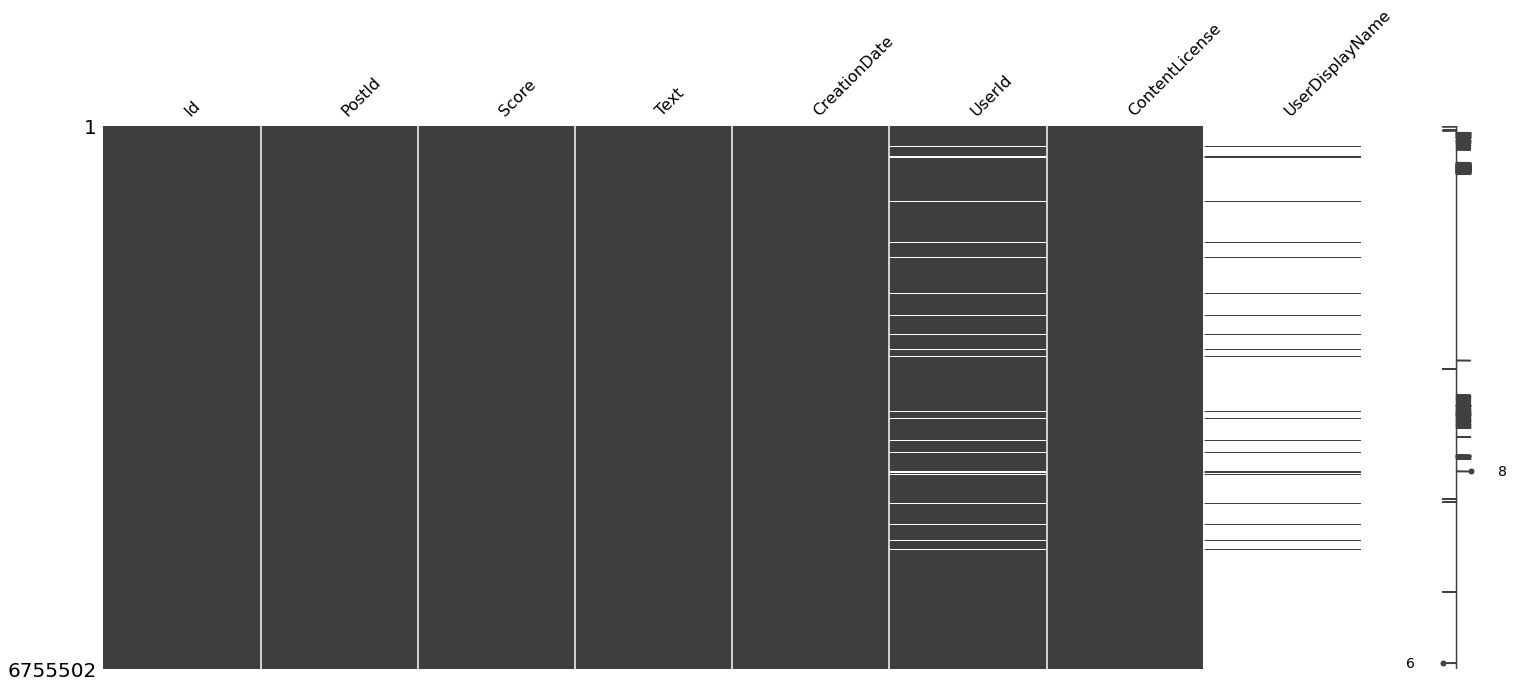

In [5]:
msno.matrix(df_comment)

In [6]:
df_comment = df_comment.drop(columns=['Score','CreationDate','ContentLicense','UserDisplayName'])
df_comment.head()

,Id,PostId,Text,UserId
0,3,9,"I like this so far, but maybe add a bit on unc...",16.0
1,5,17,"Oh, I figured as so. I remember learning about...",40.0
2,8,17,It is much better than an approximation: it gi...,55.0
3,10,20,You've missed out many types of number: comple...,35.0
4,11,17,I see. That's the problem I notice in equation...,40.0


In [7]:
df_comment = df_comment.rename(columns = {'Text':'TextComment'})
df_comment.head()

,Id,PostId,TextComment,UserId
0,3,9,"I like this so far, but maybe add a bit on unc...",16.0
1,5,17,"Oh, I figured as so. I remember learning about...",40.0
2,8,17,It is much better than an approximation: it gi...,55.0
3,10,20,You've missed out many types of number: comple...,35.0
4,11,17,I see. That's the problem I notice in equation...,40.0


In [8]:
df_comment = df_comment.dropna()

In [9]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477458 entries, 0 to 6755501
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           int64  
 1   PostId       int64  
 2   TextComment  object 
 3   UserId       float64
dtypes: float64(1), int64(2), object(1)
memory usage: 247.1+ MB


In [10]:
df_comment = df_comment[df_comment.select_dtypes(include=[np.number]).ge(0).all(1)]

In [11]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475494 entries, 0 to 6755501
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           int64  
 1   PostId       int64  
 2   TextComment  object 
 3   UserId       float64
dtypes: float64(1), int64(2), object(1)
memory usage: 247.0+ MB


In [12]:
df_comment = df_comment.astype({'UserId': 'int64'})
df_comment.dtypes

Id              int64
PostId          int64
TextComment    object
UserId          int64
dtype: object

ok pour merge

## Post

In [13]:
df_post = pd.read_xml("src/Posts.xml")

MemoryError: 

In [ ]:
df_post.head()

In [ ]:
df_post.info()

In [ ]:
msno.matrix(df_post)

In [ ]:
print(df_post.Title[1])
print(df_post.Body[1])
print(df_post.Tags[1])

In [ ]:
df_post = df_post.drop(columns=['Score','CreationDate','ViewCount','Body', 'OwnerUserId', 'LastActivityDate', 'AnswerCount', 'CommentCount', 'ClosedDate', 'ContentLicense', 'AcceptedAnswerId', 'LastEditorUserId', 'LastEditDate', 'ParentId', 'OwnerDisplayName', 'CommunityOwnedDate', 'LastEditorDisplayName', 'FavoriteCount'])
df_post.head()

In [ ]:
df_post = df_post.dropna()
df_post.info()

In [ ]:
df_post['Tags'] = df_post['Tags'].str.extract('\<(.*?)\>', expand=False).str.strip()
df_post.head()

ok pour merge

# Merge

In [ ]:
df_final = df_post.set_index('Id').join(df_comment.set_index('PostId'), on='Id')

In [ ]:
df_final.head()

In [ ]:
df_final = df_final.drop(columns=['PostTypeId', 'Id', 'UserId'])
df_final.head()

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final = df_final.rename(columns = {'Title':'patterns', 'Tags': 'tag', 'TextComment': 'responses'})
df_final.head()

In [ ]:
df_final.info()

In [ ]:
df_json = df_final.groupby("tag", dropna=False)["patterns", "responses"].aggregate(lambda tdf: tdf.unique().tolist())
df_json

In [ ]:
with open("src/sample.json", "w") as outfile:
    outfile.write(df_json.reset_index().to_json(orient='records'))